In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [114]:
import json
from operator import itemgetter

owdata = []

hero_category =  {
    'genji' : 0,
    'tracer' : 0,
    'reaper' : 0,
    'sombra' : 0,
    'mccree' : 0,
    'pharah' : 0,
    'soldier76' : 0,

    'hanzo' : 1,
    'junkrat' : 1,
    'mei' : 1,
    'widowmaker' : 1,
    'bastion' : 1,
    'torbjorn' : 1,

    'dva' : 2,
    'reinhardt' : 2,
    'orisa' : 2,
    'roadhog' : 2,
    'winston' : 2,
    'zarya' : 2,

    'lucio' : 3,
    'mercy' : 3,
    'zenyatta' : 3,
    'symmetra' : 3,
    'ana' : 3
}

def get_data( index ) :
    
    with open('data{}_{}.json'.format( index*50, index*50+50 )) as data_file:    
        data = json.load( data_file )

    for player in data:
        for server in player:

            if server in ['eu', 'us', 'kr'] and player[server] and player[server]['stats']['competitive'] and player[server]['stats']['competitive']['overall_stats']['comprank'] and player[server]['heroes']['playtime']['competitive']:
                if player[server]['stats']['competitive']['overall_stats']['comprank'] > 1000:
                    
                    hours = [ 0, 0, 0, 0 ]
                    for hero in player[server]['heroes']['playtime']['competitive']:
                        hours[ hero_category[hero] ] += player[server]['heroes']['playtime']['competitive'][hero]
                    owdata.append( [player[server]['stats']['competitive']['overall_stats']['comprank'] ] + hours )
            
for i in range(10):
    get_data( i )
    
print( len(owdata) )

906


In [152]:
owdata = np.array( owdata )

In [159]:
n_neighbors = 10

X = owdata[:, :4]
y = owdata[:, 0]

# print( X )
# print( y )

h = 2  # step size in the mesh

In [160]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFF83'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#E1E159'])

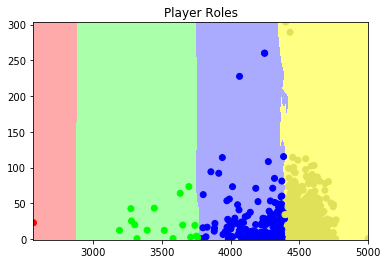

In [162]:
# for weights in ['uniform', 'distance']:

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', n_jobs=-1 )
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Player Roles")

plt.show()